# Привет уважаемый соискатель!
 Тебе предстоит пройти пару простых заданий по глубокому обучению. Это нормально не всегда понимать сразу как
 сделать ту или иную часть, видь у тебя есть возможность разобраться во всём самому! А этот навык куда ценнее
 знаний.
 Отметим сразу, что весь код написанный нами, есть лишь один из возможных путей решения задачи и ты не обязан ему
 следовать. Возможно, ты решишь использовать другие, более удобные, решения. Но как и в случае использования
 наших подсказок, так и без них, мы рекомендуем понимать, что ты пишешь и зачем. Мы будем спрашивать на собесе!
 Но ты не пугайся) Лучше разберись что и как.

In [1]:
import pandas as pd
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torch.nn as nn
from tqdm import tqdm

# Задания и оценивание
В тестировании присутствует 3 части:
- Составление датаеста
- Конструкция архитектуры нейросети
- Обучение и аналитика

Каждая из них представляет собой важный этап работы Ml-щика нашей команды, поэтому постарайся сделать их все.
Все они приносят равное количество баллов. В каждой части есть задание со звёздочкой, его делать не обязательно -
 но если ты всё-таки его сделаешь, то это поможет нам оценить твои компетенции.


Скажем пару слов о данных. Признаки представляют из себя из себя 11 непрерывных переменных, таргет - целочисленную оценку от 1 до 10. Подумай, что это за тип задачи.

In [2]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

seed_everything(123456)

# Составление датаеста

- Загрузи данные из файла our data. (тут тебе может помочь библиотека pandas)
- Раздели их по переменным X и Y.
- Сконструируй класс MyDataset. (про такого функионал класса можешь почитать [тут](https:pytorch.org/tutorials/beginner/basics/data_tutorial.html))

- "*" Импортируй линейную регрессию из библиотеки sklearn и обучи её на тех же данных. Ура! теперь у нас есть безлайн!


Загрузите данные и разделите на X, Y

In [3]:
#data = pd.read_csv('our_data.csv')
data2 = pd.read_excel('my_data 2.xlsx')
df = pd.DataFrame(data2)
headers = df.iloc[0]
data = pd.DataFrame(df.values[1:], columns=headers) #Немного преобразуем данные, потому что изначально там бред
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,target
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,5
1595,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.9951200000000001,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.9954700000000001,3.57,0.71,10.2,5


In [4]:
X = data.drop('target', axis=1)
Y = np.array(data[['target']])
Y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=object)

Создайте класс DataSet - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [5]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        cur_sample = np.array(self.x.loc[idx])
        cur_target = self.y[idx]
        return cur_sample, cur_target


    def __len__(self):
        return self.x.shape[0]

In [6]:
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)


LinearRegression()

# Сконструируйте класс нейронной сети
В этом задании тебе предстоит сконструировать полносвязную двухслойную нейронную сеть.

- Вспомните какие сущности необходимы для обучения нейронной сети и включите их в атрибуты класса.
- Основываясь на типе данной задачи выберете подходящую лосс функцию.
- На основе требований первых двух пунктов заполните методы forward и training_step
- "*" Настрой обучение батчами (это не обязательно делать в противном случае)

Напоминаем, что не обязательно пользоваться предлагаемым шаблоном! Если вы знаете более быстрые и простые пути,
то будет интересно на них посмотреть.

In [106]:
class MyNeuralNetwork:
    def __init__(self, INPUT_DIM, NUM_CLASSES, H_DIM, learning_rate):
        self.learning_rate = learning_rate
        self.w1 = np.random.rand(INPUT_DIM, H_DIM)
        self.b1 = np.random.rand(1, H_DIM)
        self.w2 = np.random.rand(H_DIM, NUM_CLASSES)
        self.b2 = np.random.rand(1, NUM_CLASSES)
        w1 = (self.w1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
        b1 = (self.b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
        w2 = (self.w2 - 0.5) * 2 * np.sqrt(1/H_DIM)
        b2 = (self.b2 - 0.5) * 2 * np.sqrt(1/H_DIM)


    def relu_(self, x):
        return np.maximum(x, 0)

    def relu_deriv(self, k):
        return (k >= 0).astype(float)

    def pred_vect(self, y, num_classes):
        self.predict = np.zeros((len(y), num_classes))
        for j, y_j in enumerate(y):
            self.predict[j, y_j] = 1
        return self.predict


    def softmax(self, t):
        out = np.exp(t)
        return out / np.sum(out, axis=1, keepdims=True)

    def cross_entrop (self, z, y):
        return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))


    def trainnig_step(self, x, y):
        t1 = self.b1 + x @ self.w1
        h1 = self.relu_(t1)
        t2 = self.b2 + t1 @ self.w2
        z = self.softmax(t2)
        E = np.sum(self.cross_entrop(z, y))

        predict = self.pred_vect(y, NUM_CLASSES)
        dE_dt2 = z - predict
        dE_dw2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ self.w2.T
        dE_dt1 = dE_dh1 * self.relu_deriv(t1)
        dE_dw1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        self.learning_rate = 0.0002
        self.w2 = self.w2 - self.learning_rate * dE_dw2
        self.w1 = self.w1 - self.learning_rate * dE_dw1
        self.b2 = self.b2 - self.learning_rate * dE_db2
        self.b1 = self.b1 - self.learning_rate * dE_db1
        loss_ar.append(E)
        return self.w1, self.w2, self.b1, self.b2




# Обучение и аналитика
В этом задании тебе предстоит обучить сконструированную архитектуру.

- Создай объект класса MyDataset и MyNet, а также других атрибутов, если ваше решение их предусматривает.
- Напишите цикл обучения нейронной сети.
- Обучите нейронную сеть и оцените финальной качество на валидационном датасете.
- "*" Каждый N-ый шаг изображайте на графике, как менялось значение лосс функции на тестовых данных и
на части валидационных данных.

Пробы пера


У меня возник ряд сложностей с преобразованием типов в предложенном Вами датафрейме, в виду чего не получилось обучить на нем НС, поэтому я просто сгенерировал случайный датасет с такими же характеристиками (1600 сэмплов, 11 фичей и 6 классов)

In [86]:
import numpy as np
from sklearn.datasets import make_classification


X, Y = make_classification(
    n_samples=1600,
    n_features=11,
    n_informative=11,
    n_redundant=0,
    n_classes=6,
    random_state=10
)

dataset = [(X[i][None, ...], Y[i]) for i in range(len(Y))]
dataset[7]

(array([[ 1.37473333,  0.44415469,  2.30790745, -2.68498505, -0.31458448,
         -0.37057292, -2.29035361,  2.9378665 , -1.11059287,  2.19856686,
          0.76386669]]),
 3)

In [107]:
ALPHA = 0.001
NUM_EPOCHS = 20
BATCH_SIZE = 20
INPUT_DIM = 11
NUM_CLASSES = 6
H_DIM = 20

dt = MyDataset(X,Y)
mynet = MyNeuralNetwork(INPUT_DIM, NUM_CLASSES, H_DIM, ALPHA)



In [108]:
loss_ar = []
for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):
        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)
        mynet.trainnig_step(x, y)




In [109]:
def predict(x):
    t1 = x @ mynet.w1 + mynet.b1
    h1 = mynet.relu_(t1)
    t2 = h1 @ mynet.w2 + mynet.b2
    z = mynet.softmax(t2)
    return z

def calc_accuracy(dataset):
    correct = 0
    for i in range(len(dataset)):
        x, y = dataset[i]
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy(dataset)
print("Accuracy:", accuracy)

Accuracy: 0.48


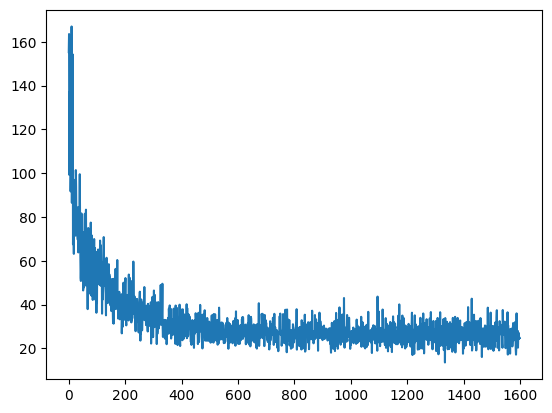

In [110]:
plt.plot(loss_ar)
plt.show()

При создании класс НС у меня не получилось улучшить точность предсказаний (изменяя гиперпараметры я добился примерно 0.5 верных ответов)
Хотя далее, я покажу как использовал ту же нейросеть вне класса, и получил довольно приемлемую точность, к сожалению я так и не смог найти ошибку, из-за которой class MyNeuralNetwork работает некорректно.

Accuracy: 0.79


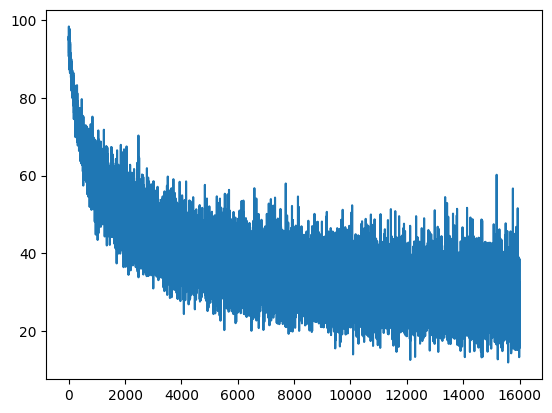

In [114]:
INPUT_DIMEN = 11
NUMBER_CLASSES = 6
H_DIMEN = 20

def relu_(t):
    return np.maximum(t, 0)

def softmax_(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)

def cross_entropy(z, y):
    return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def pred_vector(y, num_classes):
    prediction = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        prediction[j, yj] = 1
    return prediction

def relu_deriv(t):
    return (t >= 0).astype(float)


W1 = np.random.rand(INPUT_DIMEN, H_DIMEN)
B1 = np.random.rand(1, H_DIMEN)
W2 = np.random.rand(H_DIM, NUMBER_CLASSES)
B2 = np.random.rand(1, NUMBER_CLASSES)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIMEN)
B1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIMEN)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIMEN)
B2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIMEN)

ALPHA = 0.0002
NUM_EPOCHS = 500
BATCH_SIZE_ = 50

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE_):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE_ : i*BATCH_SIZE_+BATCH_SIZE_])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        T1 = x @ W1 + B1
        H1 = relu_(T1)
        T2 = H1 @ W2 + b2
        Z = softmax_(T2)
        E = np.sum(cross_entropy(Z, y))

        # Backward
        prediction = pred_vector(y, NUMBER_CLASSES)
        dE_dt2 = Z - prediction
        dE_dW2 = H1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * relu_deriv(T1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Update
        W1 = W1 - ALPHA * dE_dW1
        B1 = B1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        B2 = B2 - ALPHA * dE_db2
        loss_arr.append(E)

def predict(x):
    T1 = x @ W1 + B1
    H1 = relu_(T1)
    T2 = H1 @ W2 + B2
    Z = softmax_(T2)
    return Z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()


Не в зависимости от того что тебе удалось сделать , скажи пару слов о том, в чём ты смог разобраться (если такие открытия были) и о том, какие изменения / дополнения и почему ты привнёс в заготовленный нами шаблон.

В целом, я впервые познакомился с нейросетями, поэтому задания 2, 3 полностью были новыми для меня, разобрался в устройстве НС, в принципе работы, узнал несколько алгоритмов обучений, один из них пытался реализовать, но в классе это не особо получилось, все изменения в шаблоне были вызваны тем, что я изучал тему практически с 0, и использовал простые примеры.